In [3]:
!pip install PyWavelets
!pip install opencv-python
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import cv2
import matplotlib as mp
from matplotlib import pyplot as plt
%matplotlib inline

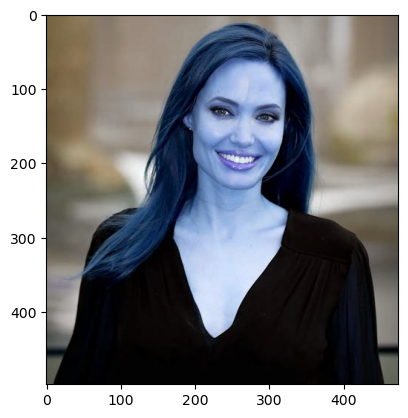

In [7]:
img = cv2.imread('C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg')
plt.imshow(img)

In [9]:
img.shape

(498, 474, 3)

In [11]:
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gr.shape

(498, 474)

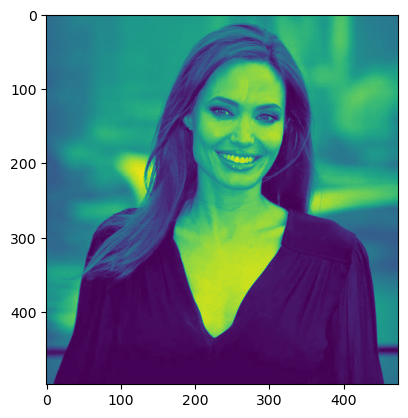

In [13]:
plt.imshow(gr)

In [17]:
face = cv2.CascadeClassifier('C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/haarcascade_eye.xml')

faces = face.detectMultiScale(gr)
faces

array([[183,  71, 162, 162]])

In [19]:
(x,y,w,h) = faces[0]
x ,y ,w ,h

(183, 71, 162, 162)

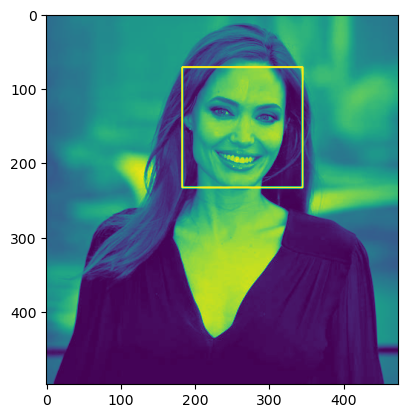

In [21]:
f = cv2.rectangle(gr,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(f)

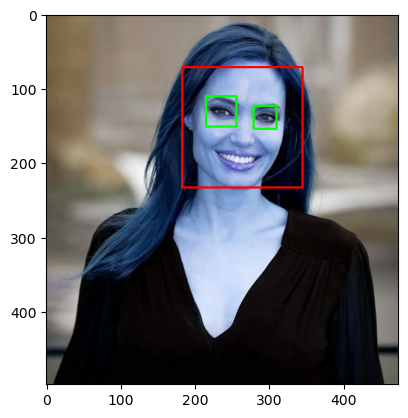

In [23]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gr[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

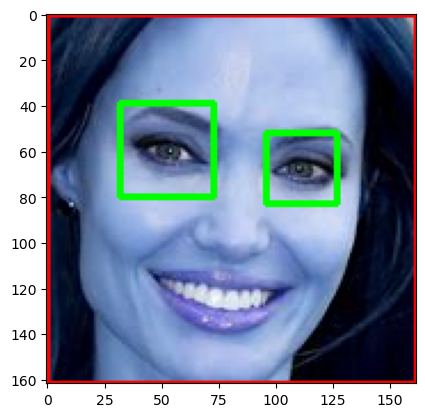

In [25]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [27]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [87]:
path_to_data = "C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/"
path_to_cr_data = "C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/"

In [89]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [91]:
img_dirs

['C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Angelina Jolie',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Ashish',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Brad Pitt',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Denzel Washington',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Hugh Jackman',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Jennifer Lawrence',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Johnny Depp',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Kate Winslet',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Leonardo DiCaprio',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Megan Fox',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/Natalie Portman',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/

In [93]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [95]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

Angelina Jolie
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie
Ashish
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Ashish
Brad Pitt
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Brad Pitt
Denzel Washington
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Johnny Depp
Kate Winslet
Generating

In [96]:
celebrity_file_names_dict

{'Angelina Jolie': ['C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie1.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie2.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie3.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie4.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie5.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie6.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie7.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie/Angelina Jolie8.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/

In [97]:
cropped_image_dirs

['C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Ashish',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Brad Pitt',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Denzel Washington',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Hugh Jackman',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Jennifer Lawrence',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Johnny Depp',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Kate Winslet',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Leonardo DiCaprio',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Megan Fox',
 'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped

In [98]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Angelina Jolie': ['C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie1.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie10.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie11.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie12.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie13.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie14.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie15.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/InterviewPrep/celeb/dataset/cropped/Angelina Jolie\\Angelina Jolie16.png',
  'C:/Users/ASHISH MEENA/OneDrive/Desktop/Inter

In [99]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [100]:
#just labeling each one, otherwise we can use labelencoder as well but will require extraction of each name, but anyways
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angelina Jolie': 0,
 'Ashish': 1,
 'Brad Pitt': 2,
 'Denzel Washington': 3,
 'Hugh Jackman': 4,
 'Jennifer Lawrence': 5,
 'Johnny Depp': 6,
 'Kate Winslet': 7,
 'Leonardo DiCaprio': 8,
 'Megan Fox': 9,
 'Natalie Portman': 10,
 'Nicole Kidman': 11,
 'Robert Downey Jr': 12,
 'Sandra Bullock': 13,
 'Scarlett Johansson': 14,
 'Tom Cruise': 15,
 'Tom Hanks': 16,
 'Will Smith': 17}

In [101]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [102]:
print(len(X[0]))
print(len(X))
print(len(y))
X[0]
y[0]
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

4096
1409
1409


(1409, 4096)

In [103]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6312056737588653

In [105]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.83      0.83      0.83         6
           2       0.45      0.83      0.59         6
           3       0.67      0.86      0.75         7
           4       0.57      0.57      0.57         7
           5       0.42      0.80      0.55        10
           6       0.50      0.25      0.33         4
           7       0.86      0.55      0.67        11
           8       1.00      0.40      0.57         5
           9       1.00      0.75      0.86         8
          10       0.60      0.60      0.60        10
          11       0.75      0.55      0.63        11
          12       0.00      0.00      0.00         8
          13       0.50      0.50      0.50         6
          14       0.84      0.89      0.86        18
          15       0.75      0.60      0.67         5
          16       0.80      0.57      0.67         7
          17       0.38    

In [106]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [107]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [108]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.654564,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.327254,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.639585,{'logisticregression__C': 5}


In [109]:
best_estimators['svm'].score(X_test,y_test)

0.6808510638297872

In [110]:
best_clf = best_estimators['svm']

In [111]:
# def ppi(img):
#     # Resize image to 32x32
#     img_resized = cv2.resize(img, (32, 32))

#     # Flatten image (32x32x3 -> 3072)
#     img_flattened = img_resized.flatten()

#     # Add a grayscale channel (32x32 -> 1024)
#     img_grayscale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY).flatten()

#     # Combine both flattened arrays (3072 + 1024 = 4096)
#     img_features = np.concatenate((img_flattened, img_grayscale))

#     # Reshape for prediction (1, 4096)
#     return img_features.reshape(1, -1).astype(float)

# label_to_name = {v: k for k, v in class_dict.items()}

In [112]:
def ppi(img):
    if img is None:
        raise ValueError("Input image is None. Ensure the image exists and cropping is successful.")

    # Resize image to 32x32
    img_resized = cv2.resize(img, (32, 32))

    # Flatten the image (32x32x3 -> 3072)
    img_flattened = img_resized.flatten()

    # Convert to grayscale and flatten (32x32 -> 1024)
    img_grayscale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY).flatten()

    # Combine both flattened arrays (3072 + 1024 = 4096)
    combined_features = np.concatenate((img_flattened, img_grayscale)).reshape(1, -1).astype(float)

    return combined_features

def get_cropped_image_if_2_eyes(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    if len(faces) == 0:
        raise ValueError("No face detected in the image!")

    # Crop the first detected face
    x, y, w, h = faces[0]
    cropped_face = img[y:y+h, x:x+w]

    return cropped_face

image_path = "C:/Users/ASHISH MEENA/OneDrive/Desktop/sv.jpg"

try:
    # Get cropped face
    cropped_img = get_cropped_image_if_2_eyes(image_path)

    # Prepare features for prediction
    img_features = ppi(cropped_img)

    # Predict using the trained model
    prediction = best_clf.predict(img_features)

    # Get the name of the predicted class
    print(label_to_name.get(prediction[0], "Unknown"))

except ValueError as e:
    print(f"Error: {e}")


Error: Image not found: C:/Users/ASHISH MEENA/OneDrive/Desktop/sv.jpg


In [113]:
# image_path = 'X:/B/me.jpg'
# img = get_cropped_image_if_2_eyes(image_path)
# img_features = ppi(image_path)
# prediction = best_clf.predict(img_features)
# print(label_to_name.get(prediction))

In [115]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']